In [1]:
import os
from shutil import copy

import numpy as np
import pandas as pd

In [2]:
FOLDER_PATH = "data/75k"
NEW_FOLDER_PATH = FOLDER_PATH + "_balanced2"

In [3]:
root_path = os.path.dirname(os.path.dirname(os.getcwd()))
data_folder_path = os.path.join(root_path, FOLDER_PATH)
vehicle_data_file_path = os.path.join(data_folder_path, "VehicleData.txt")

df = pd.read_csv(vehicle_data_file_path, sep=" ", header=None,
                 names=["image_path", "throttle", "break", "steering_angle", "velocity"])
df.describe()

,throttle,break,steering_angle,velocity
count,75210.000000,75210.000000,75210.000000,0.0
mean,2414.278141,9389.902885,-0.180175,NaN
std,1538.346430,9881.330790,2.876228,NaN
min,13.473060,0.000000,-28.368830,NaN
25%,335.378750,0.000000,-0.000510,NaN
50%,3442.008000,252.002200,-0.000069,NaN
75%,3600.000000,20000.000000,0.000395,NaN
max,3600.000000,20000.000000,27.793550,NaN


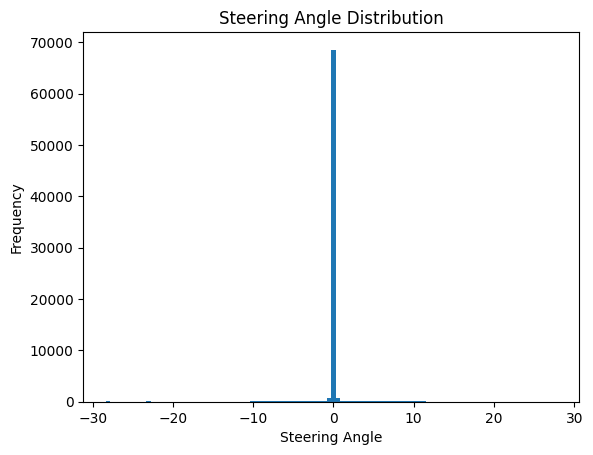

In [4]:
import matplotlib.pyplot as plt

plt.hist(df["steering_angle"], bins=100)
plt.title("Steering Angle Distribution")
plt.xlabel("Steering Angle")
plt.ylabel("Frequency")
plt.show()

# Filtering

# Balance Data

In [5]:
df_only_turns = df[abs(df.steering_angle) >= 1]
df_no_turns = df[abs(df.steering_angle) < 1]

number_of_turn_data = len(df_only_turns)

df_partial_no_turns_data = df_no_turns.sample(n=1000, replace=False)
balanced_df = pd.concat((df_only_turns, df_partial_no_turns_data))
balanced_df = balanced_df.sort_index()
final_df = balanced_df

## Only turns

In [46]:
final_df = df
final_df = final_df[final_df.steering_angle <= 5]
final_df = final_df[final_df.steering_angle >= -5]

## Final Data

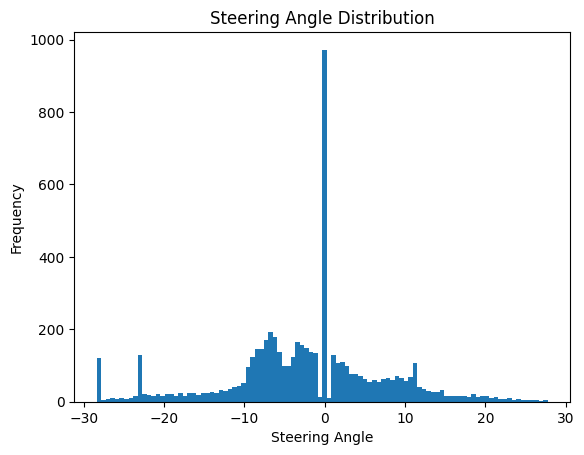

In [6]:
plt.hist(final_df["steering_angle"], bins=100)
plt.title("Steering Angle Distribution")
plt.xlabel("Steering Angle")
plt.ylabel("Frequency")
plt.show()

# Update DF

In [7]:
df = final_df

In [8]:
df.describe()

,throttle,break,steering_angle,velocity
count,6048.000000,6048.000000,6048.000000,0.0
mean,990.217907,1830.209280,-2.231308,NaN
std,1249.288704,5450.875214,9.910680,NaN
min,13.474770,0.000000,-28.368830,NaN
25%,67.364430,0.000000,-7.272116,NaN
50%,440.072800,0.000000,-1.422471,NaN
75%,1243.180250,0.000000,2.721885,NaN
max,3600.000000,20000.000000,27.793550,NaN


# Save Data

In [9]:
new_folder_path = os.path.join(root_path, NEW_FOLDER_PATH)
new_vehicle_data_file_path = os.path.join(new_folder_path, "VehicleData.txt")
new_image_folder_path = os.path.join(new_folder_path, "IMG")

os.makedirs(new_folder_path)
os.makedirs(new_image_folder_path)

In [10]:
with open(new_vehicle_data_file_path, "w+") as file:
    np.savetxt(file, final_df.values, fmt="%s")

for index, row in final_df.iterrows():
    image_path = row.image_path[1:]
    source_image_folder_path = os.path.join(data_folder_path, image_path)  # image_path starts with '/'
    destination_image_folder_path = os.path.join(new_folder_path, image_path)
    if os.path.exists(source_image_folder_path):
        copy(source_image_folder_path, destination_image_folder_path)